# CODIGO

##### EN ESTE CODIGO, VEREMOS COMO TRATAR VARIABLES CATEGORICAS Y NUMERICAS PARA SU VISUALIZACIÓN, RELACIÓN Y CONSTRUCCIÓN DE MODELOS. VEREMOS LA IMPORTANCIA DE LOS MISSING VALUES, COMO TRATARLOS Y VER COMO EL DESBALANCEAMIENTO DE CLASES EN UNA VARIABLE TARGET PUEDE EMPEORAR SIGNIFICATIVAMENTE NUESTROS MODELOS. LE DAREMOS SOLUCIÓN A ELLO PARA QUE EL MODELO MEJORE. CUALQUIER OTRA SUGERENCIA O COLABORACIÓN, ESTARÉ ENCANTADO DE ESCUCHARLA!

In [2]:
import pandas as pd 

data = pd.read_csv("healthcare-dataset-stroke-data.csv")

data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


##### SIEMPRE ES IMPORTANTE VER COMO SE ESTRUCTURAN NUESTROS DATOS. LAS COLUMNAS QUE HAY, CUANTAS FILA TENEMOS, EL TIPO DE DATO QUE MANEJAMOS, ETC.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


##### VARIABLES:

1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not

##### VIENDO LAS VARIABLES, OBSERVAMOS QUE "Hypertension", "heart_disease" y "stroke" ESTÁN PUESTAS COMO INT64 PERO LAS QUEREMOS EN TIPO OBJECT (YA QUE EL RESTO DE CATEGÓRICAS ESTÁN PUESTAS ASÍ) PARA PODER HACER POR UN LADO, UN ANÁLISIS EXPLORATORIO Y, POR OTRO LADO, UNA VISUALIZACIÓN GRÁFICA DE LOS DATOS QUE CONTIENEN ESTAS VARIABLES. POR ELLO LAS TRANSFORMAMOS AUNQUE LUEGO, LAS PONGAMOS EN INT64 DE NUEVO TRAS EL ESCALADO QUE HAGAMOS PARA CONSTRUIR NUESTRO MODELO.

In [4]:
data["hypertension"] = data["hypertension"].astype("object")
data["heart_disease"] = data["heart_disease"].astype("object")
data["stroke"] = data["stroke"].astype("object")

##### SIEMPRE NOS VA A VENIR BIEN VER LOS NIVELES DE LAS VARIABLES CATEGORICAS, UN PASO QUE ADEMÁS SOLO SE PUEDE HACER SI HACEMOS LA TRANSFORMACIÓN ANTERIOR.

In [5]:
# Vamos a ver los niveles de la variables categoricas (object)

def uniqueValues(col):
    return list(data[col].unique())

for col in data.select_dtypes('object').columns:
    print(f'{col}\n{uniqueValues(col)}\n')

gender
['Male', 'Female', 'Other']

hypertension
[0, 1]

heart_disease
[1, 0]

ever_married
['Yes', 'No']

work_type
['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked']

Residence_type
['Urban', 'Rural']

smoking_status
['formerly smoked', 'never smoked', 'smokes', 'Unknown']

stroke
[1, 0]



##### TENEMOS QUE VER SI NUESTRO DATASET CONTIENE MISSING VALUES Y, EN CASO AFIRMATIVO, VER QUE HACEMOS CON ELLOS. 

In [6]:
missing_values = data.isnull().sum()
print(missing_values)

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


##### OBSERVAMOS QUE LA VARIABLE "bmi" TIENE 201 MISSING VALUES. ¿QUÉ DEBERIAMOS HACER CON ELLOS? POR UN LADO, TENEMOS QUE VER QUE NO TENEMOS MUCHISIMAS OBSERVACIONES (5110) POR LO QUE QUITAR 201 OBSERVACIONES PODRÍA ALTERAR NUESTROS RESULTADOS SIGNIFICATIVAMENTE. ADEMÁS, ES UNA VARIABLE IMPORTANTE QUE PODRIA TENER UN IMPACTO ALTO EN LA VARIABLE TAGET, POR LO QUE ELIMINARLO NO ES UNA OPCIÓN. PERO, ¿QUE HACEMOS? ¿COMO RELLENAMOS ESTOS DATOS QUE NOS FALTAN? PUES HAY VARIOS MÉTODOS EN EL CASO DE LAS VARIABLES NUMÉRICAS COMO:

1) IMPUTACIÓN A TRAVÉS DE LA MEDIA
2) IMPUTACIÓN A TRAVÉS DE LA MEDIANA
3) IMPUTACIÓN A TRAVÉS DE LA MODA
4) IMPUTACIÓN CON LAS MEDIDAS DE ANTES A TRAVÉS DE GRUPOS (SEXO POR EJEMPLO)

##### LA IMPUTACIÓN INTENTA RELLENAR ESTOS DATOS FALTANTES CON VALORES APROXIMADOS A UNA MEDIDA, COMO SON LAS MENCIONADAS. LA MEDIA SERÍA CUANDO NUESTROS DATOS SON SIMÉTRICOS, COSA QUE PODEMOS VER FACILMENTE CON UN HISTOGRAMA Y VER COMO SE DISTRIBUYEN LAS BARRAS. LA MEDIANA ES CUANDO NUESTRA DISTRIBUCIÓN NO ES SIMÉTRICA. LA MODA APROXIMA AL VALOR MÁS FRECUENTE Y LA IMPUTACIÓN POR GRUPOS ES LO MISMO QUE LO ANTERIOR PERO A TRAVÉS DE OTRA VARIABLE.

### HISTOGRAMA BMI

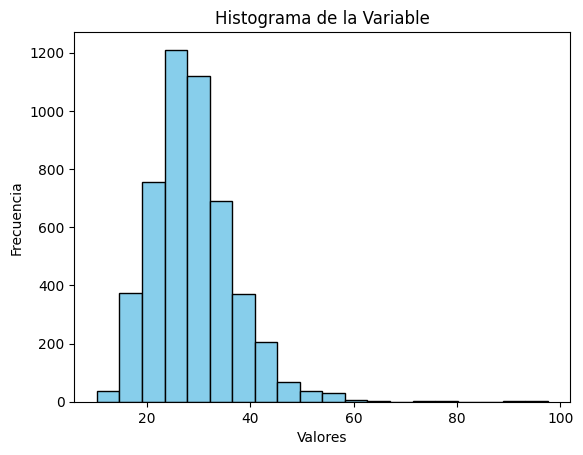

In [7]:
import matplotlib.pyplot as plt
# Crear el histograma
plt.hist(data["bmi"], bins=20, color='skyblue', edgecolor='black') # bins = 20 para crear más barras y ver mejor su distribución
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma de la Variable')
plt.show()

##### OBSERVAMOS QUE EL HISTOGRAMA NO TIENE UNA DISTRIBUCIÓN SIMÉTRICA, SINO UNA ASIMÉTRICA HACIA LA DERECHA. ESTO HACE QUE LA MEJOR FORMA DE IMPUTACIÓN SEA A TRAVÉS DE LA MEDIANA, QUE ADEMÁS ES MEJOR (MENOS SENSIBLE) A OUTLIERS

In [8]:
# Son 201 filas y no quiero eliminarlas, asi que vamos a imputarlas a través de la mediana, que es menos sensibles a outliers

# Imputación con la mediana
data['bmi'] = data['bmi'].fillna(data['bmi'].median())



##### IMPORTANTE ELIMINAR LA VARIABLE "id" YA QUE NO ES RELEVANTE PARA EL ANÁLISIS AL SER UN SIMPLE IDENTIFICADOR DE LA OBSERVACIÓN

In [9]:
# Voy a eliminar la columna id que no sirve
data = data.drop(columns=['id'])

### EDA

##### HAGAMOS UN PEQUEÑO ANÁLISIS EXPLORATORIO DE NUESTRAS VARIABLES NUMÉRICAS Y CATEGORICAS.

In [10]:
data.describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000
mean,43.226614,106.147677,28.862035
std,22.612647,45.283560,7.699562
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.800000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,32.800000
max,82.000000,271.740000,97.600000


##### PODEMOS OBSERVAR QUE LA MEDIA DE EDAD ES DE 43 AÑOS, QUE TIENEN UN bmi DE 28.86 DE MEDIA (UN POCO ALTO) Y UNA MEDIA DE GLUCOSA DE 106.14, LO CUAL ESTÁ DENTRO DE LOS NIVELES. AUN ASÍ, OBSERVAMOS UNA DESVIACIÓN ESTANDAR ALTA EN LAS TRES (SOBRE TODO EN AGE Y AVG_GLUCOSE_LEVEL), POR ESO TAL VEZ MIRAR LA MEDIANA (50%) SEA MÁS RECOMENDABLE.

##### VAMOS A HACER UN CONTEO EN LAS VARIABLES CATEGORICAS PARA HACERNOS UNA IDEA DE SI ESTÁ DESBALANCEADO NUESTRO DATASET.

In [11]:
# Obtener columnas categóricas
categorical_cols = data.select_dtypes(include=['object']).columns
# Crear un diccionario para almacenar los recuentos
recuentos = {}

# Recuento de cada variable categórica
for col in categorical_cols:
    recuentos[col] = data[col].value_counts()

# Mostrar resultados
for col, counts in recuentos.items():
    print(f"Recuento para {col}:\n{counts}\n")

Recuento para gender:
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

Recuento para hypertension:
hypertension
0    4612
1     498
Name: count, dtype: int64

Recuento para heart_disease:
heart_disease
0    4834
1     276
Name: count, dtype: int64

Recuento para ever_married:
ever_married
Yes    3353
No     1757
Name: count, dtype: int64

Recuento para work_type:
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

Recuento para Residence_type:
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

Recuento para smoking_status:
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

Recuento para stroke:
stroke
0    4861
1     249
Name: count, dtype: int64



##### CLARAMENTE, EL DATASET ESTÁ DESBALANCEADO, Y ESTO SE VE PORQUE LA VARIABLE TARGET TIENE UNA CLASE MUY MAYORITARIA Y OTRA MINORITARIA. ADEMÁS, OBSERVAMOS QUE EN LA VARIABLE GENDER, EL NIVEL OTHER CONTIENE SOLO 1 RECUENTO, POR LO QUE VOY A ELIMINARLA Y PODER TRATARLA COMO UNA VARIABLE BINARIA. AUNQUE HABRÍA QUE HACER UN SOBREMUESTREO EN LA VARIABLE TARGET, PRIMERO CONSTRUIREMOS Y EVALUAREMOS EL MODELO ASI TAL CUAL Y LUEGO CON EL SOBREMUESTREO PARA OBSERVAR LOS CAMBIOS EN EL RENDIMIENTO DEL MISMO.

In [12]:
# Solo hay 1 personas en "otros" en la columna del género, asi que por mera complejidad, voy a eliminarla

data = data[data['gender'] != 'Other']

##### OBSERVAMOS COMO ESTÁ NUESTRO DATASET TRAS TODOS LOS CAMBIOS.

In [13]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


##### UN ULTIMO VISTAZO A LA ESTRUCTURA DE NUESTROS DATOS

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   object 
 3   heart_disease      5109 non-null   object 
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   object 
dtypes: float64(3), object(8)
memory usage: 479.0+ KB


### VISUALIZACIÓN DE LOS DATOS

##### VAMOS A VISUALIZAR LOS DATOS DE NUESTRAS VARIABLES CATEGORICAS Y NUMERICAS FRENTE A LA VARIABLE TARGET STROKE.

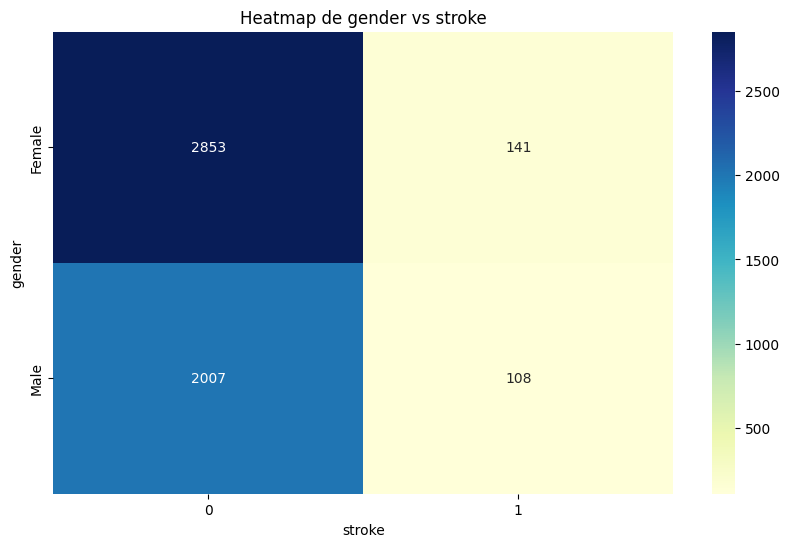

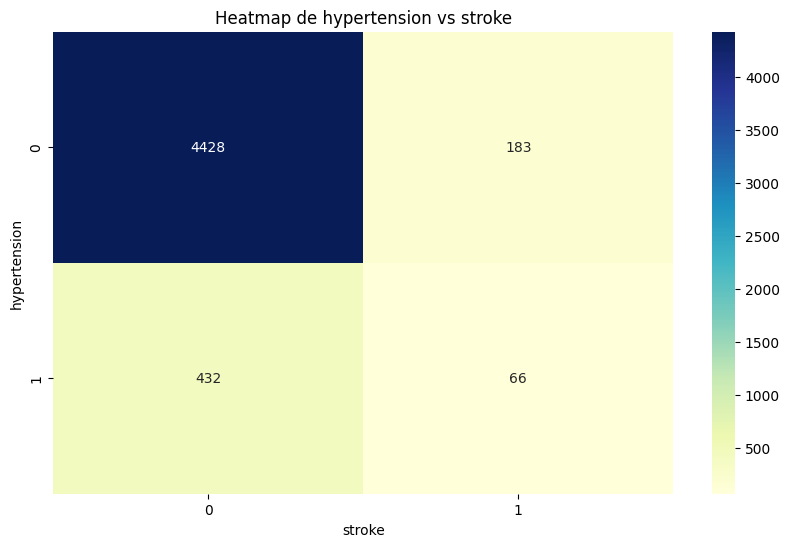

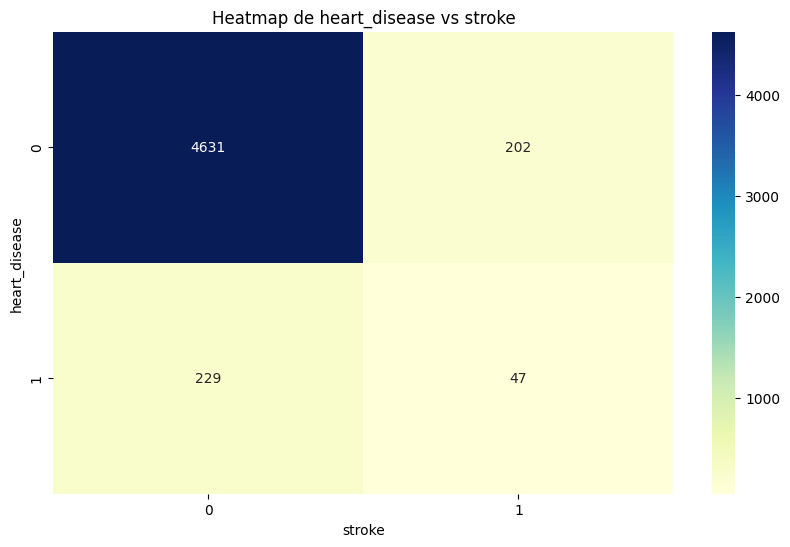

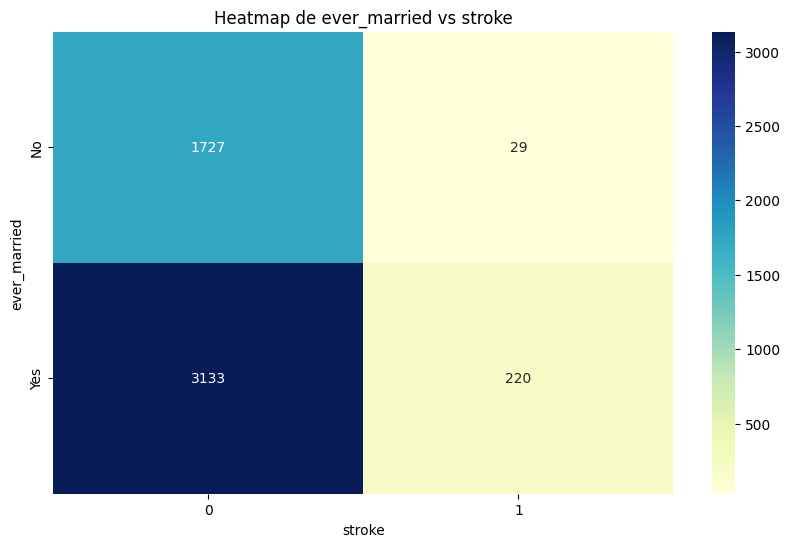

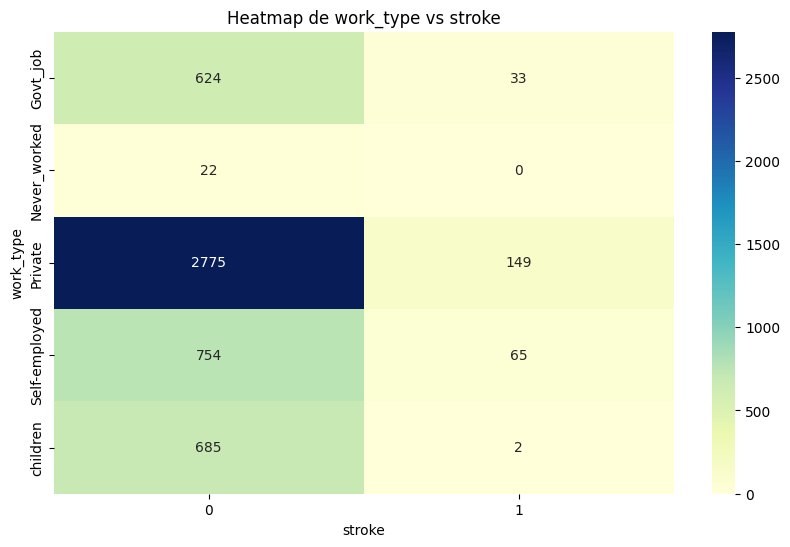

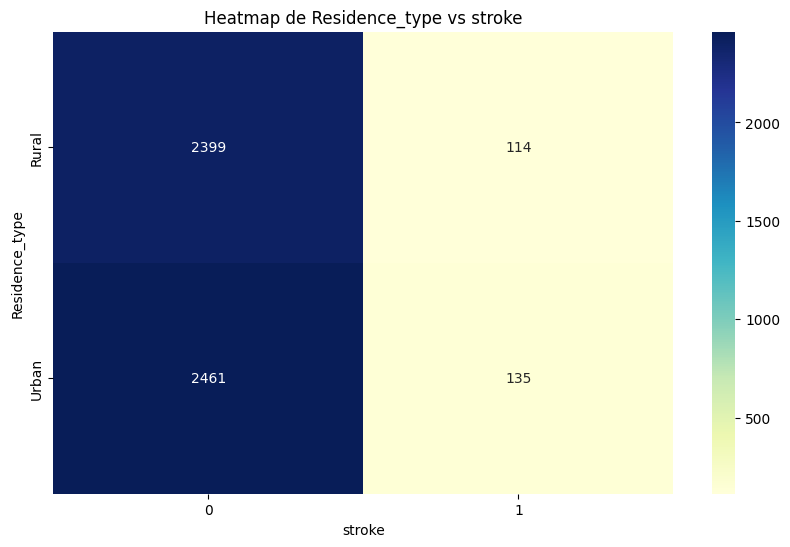

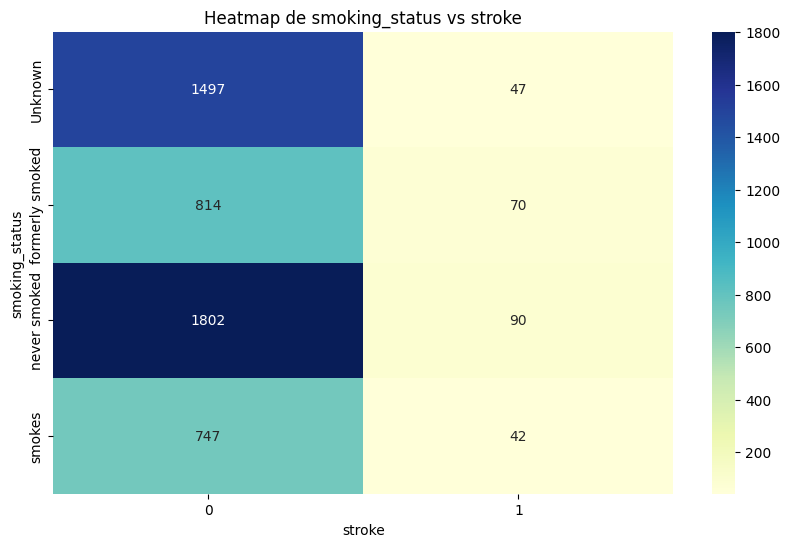

In [15]:
# Creación de Gráficos
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Heatmap

# Creamos un bucle for para iterar sobre las variables categóricas
for var in categorical_cols:
    if var != 'stroke':  # Evitar graficar 'stroke' consigo misma
        # Crear la tabla de contingencia
        contingency_table = pd.crosstab(data[var], data["stroke"])
    
        # Opcional: calcular proporciones
        # contingency_table = contingency_table.div(contingency_table.sum(axis=1), axis=0)

        # Crear el heatmap
        plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura según sea necesario
        sns.heatmap(contingency_table, annot=True, fmt='g', cmap='YlGnBu', cbar=True)

        # Ponemos un título
        plt.title(f"Heatmap de {var} vs stroke")
    
        # Lo imprimimos
        plt.show()

##### LO QUE PODEMOS OBSERVAR ES QUE, HAY CIERTOS GRUPOS QUE TIENEN MÁS TENDENCIA A STROKE DEBIDO A QUE TIENEN UN RECUENTO MUCHO MAYOR. DE HEHCO, EN AQUELLOS HEATMAPS DONDE HAY UN DESBALANCEO EN LA VARIABLE PREDICTORA Y VEMOS UN NUMERO SIMILAR PARA STROKE POSITIVO (1), PODEMOS IMAGINAR QUE SI LA CLASE ESTUVIERA BALANCEADA, SERÍA MUY DISTINTO. TAMBIÉN ES CIERTO QUE LA PROPIA VARIABLE TARGET (STROKE) ESTÁ DESBALANCEADA, POR LO QUE HAY QUE TENER ESTO EN CUENTA.

##### VEAMOS LA VISUALIZACIÓN EN EL CASO DE LAS VARIABLES NUMÉRICAS.

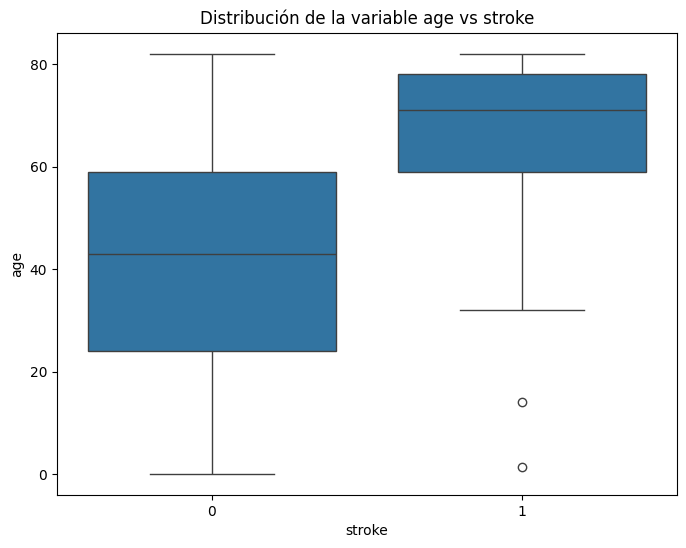

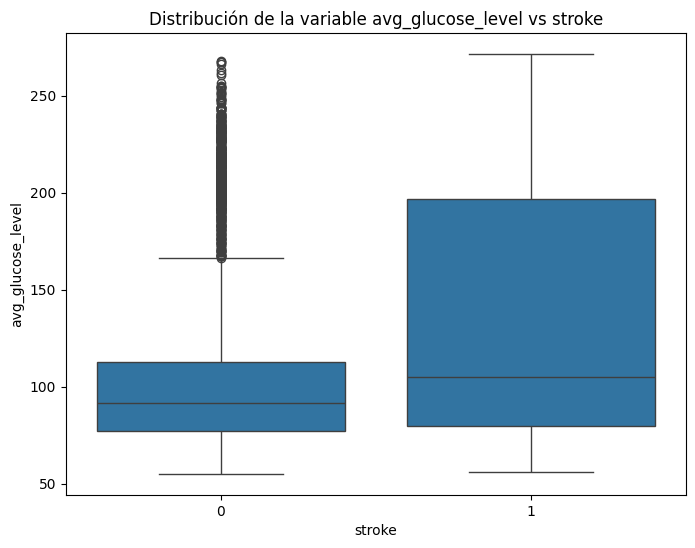

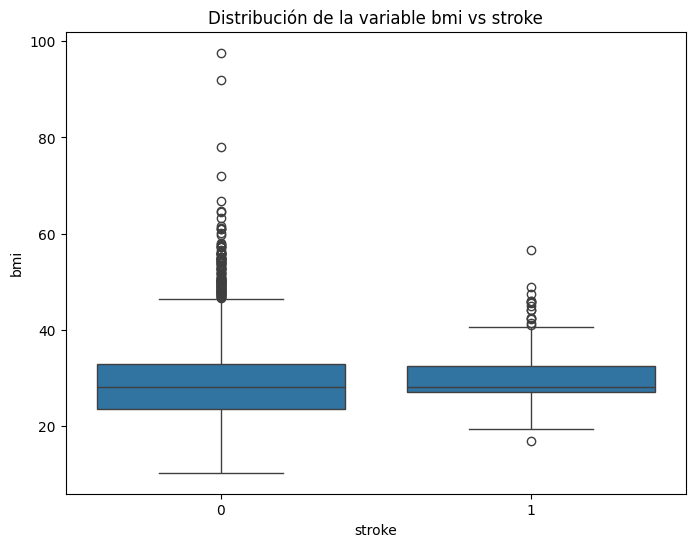

In [16]:
#Cogemos las variables numericas
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Iterar sobre las columnas numéricas
for var in numeric_columns:
    
    # Crear el boxplot para cada variable numérica frente a la variable 'target'
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data["stroke"], y=var, data=data)
    
    # Título dinámico
    plt.title(f"Distribución de la variable {var} vs stroke")
    
    # Mostrar el gráfico
    plt.show()

##### OBSERVAMOS UN GRAN NÚMERO DE VALORES APARENTEMENTE ATÍPICOS EN LOS GRÁFICOS. ESTO PODRÍA SER UN PROBLEMA SI CIERTAMENTE SON OUTLIERS QUE ESTÁN HACIENDO RUIDO EN NUESTRO DATASET. POR OTRO LADO, PODRIAN SER SIGNIFICATIVOS Y DEBEN DE INCLUIRSE EN LOS MODELOS. POR ELLO, CONSTRUIREMOS Y EVALUAREMOS LOS MODELOS CON Y SIN OUTLIERS.

### CORRELACIÓN DE LAS VARIABLES

##### PARA VER LA CORRELACIÓN DE LAS VARIABLES, PRIMERO DEBEMOS CODIFICAR LAS VARIABLES CATEGORICAS (BINARIAS, ORDINALES, NOMINALES) PARA PODER CORRELACIONARLAS TODAS ENTRE SI. 

In [17]:
# Voy a codificar las variables categoricas antes de hacer la matriz de correlacion
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

# Suponiendo que ya tienes listas de columnas por tipo:
binary_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'stroke']
nominal_cols = ['smoking_status', 'work_type']
# Codificación para variables binarias
label_encoder = LabelEncoder()
for col in binary_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Codificación para variables nominales
data = pd.get_dummies(data, columns=nominal_cols)

# Codificación para variables ordinales (no hay en este dataset)
# for col, categories in ordinal_cols.items():
    #ordinal_encoder = OrdinalEncoder(categories=[categories])
    #data[col] = ordinal_encoder.fit_transform(data[[col]])

##### HACEMOS LA MATRIZ DE CORRELACIÓN

<Axes: >

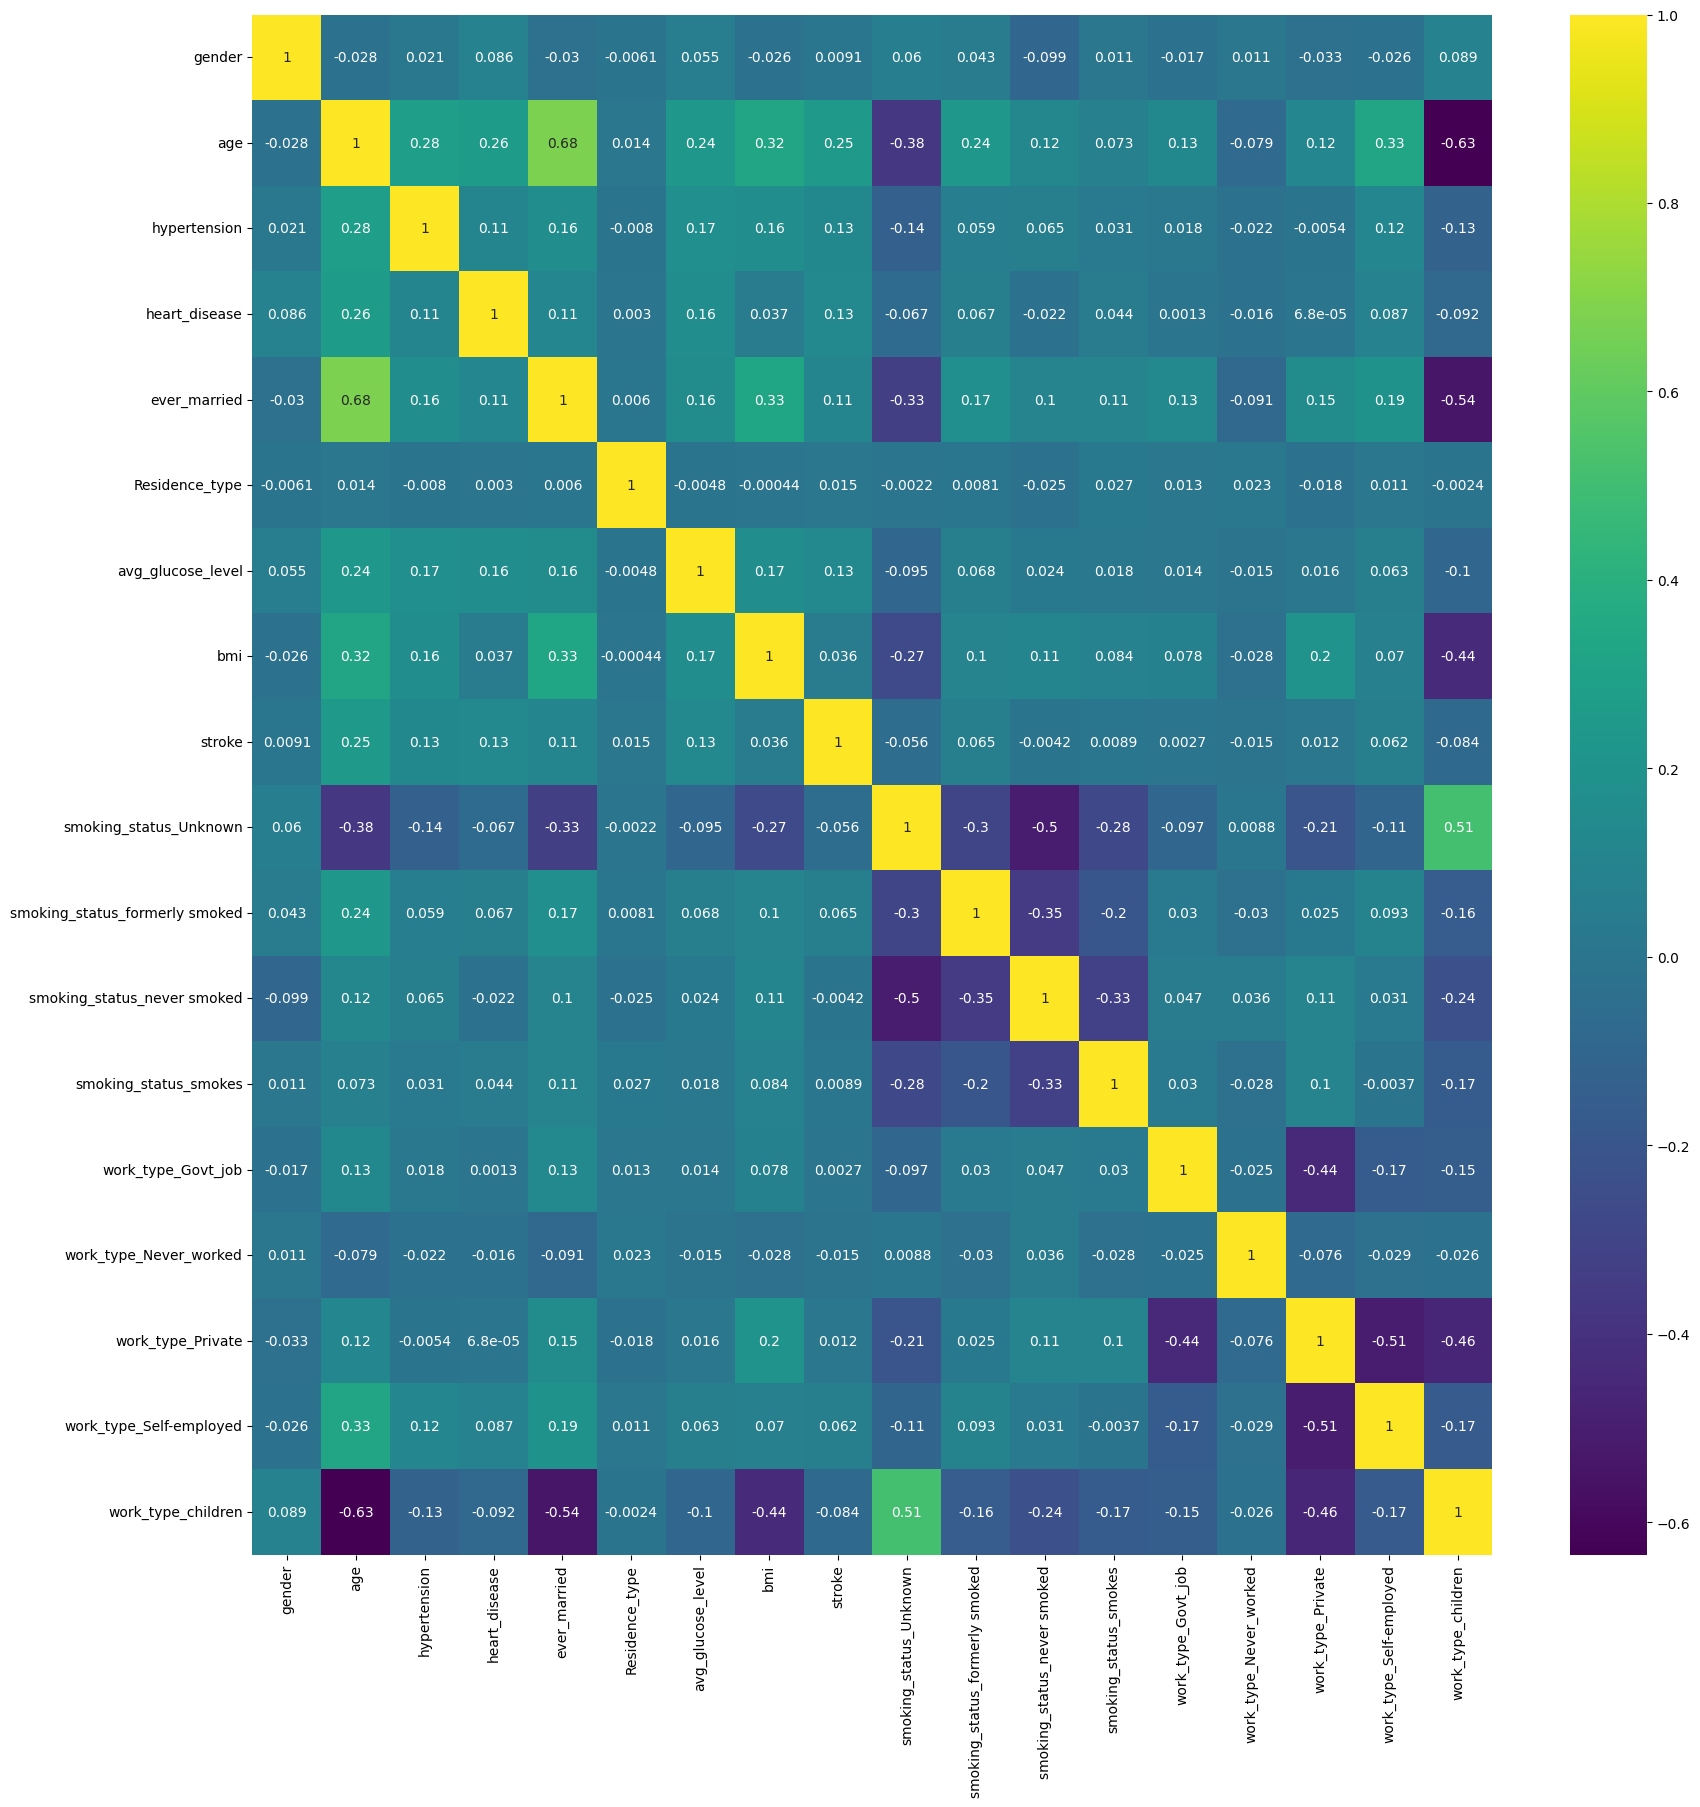

In [18]:
Correlation_Matrix=data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(Correlation_Matrix,annot=True,cmap='viridis')

##### CON RESPECTO A LA VARIABLE STROKE, OBSERVAMOS UNA RELACIÓN POSITIVA, AUNQUE NO MUY GRANDE, DE LA VARIABLE AGE, HIPERTENSION Y HEART_DISEASE. TAMBIÉN HAY OTRAS RELACIONES QUE DEJO QUE VEAIS Y COMPARTAIS VOSOTROS MISMOS!

##### VAMOS A VER DE NUEVO LA ESTRUCTURA DEL DATASET ANTES DE HACER LOS MODELOS PARA VER QUE, EFECTIVAMENTE, TODAS LAS COLUMNAS ESTÁN COMO DEBERÍAN.

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          5109 non-null   int64  
 1   age                             5109 non-null   float64
 2   hypertension                    5109 non-null   int64  
 3   heart_disease                   5109 non-null   int64  
 4   ever_married                    5109 non-null   int64  
 5   Residence_type                  5109 non-null   int64  
 6   avg_glucose_level               5109 non-null   float64
 7   bmi                             5109 non-null   float64
 8   stroke                          5109 non-null   int64  
 9   smoking_status_Unknown          5109 non-null   bool   
 10  smoking_status_formerly smoked  5109 non-null   bool   
 11  smoking_status_never smoked     5109 non-null   bool   
 12  smoking_status_smokes           5109 no

##### EFECTIVAMENTE, LAS NUMERICAS ESTÁN COMO FLOAT64, LAS CATEGORICAS BINARIA EN INT64 TRAS LA CODIFICACIÓN PERO LOS NIVELES DE LAS VARIABLES NOMINALES DEBERIAN DE NO APARECER COMO BOOL SINO COMO INT64 COMO LAS BINARIAS. ADEMÁS, STROKE, QUE ES LA VARIABLE TARGET, DEBERIA ESTAR COMO CATEGORICA. VAMOS A HACER LOS CAMBIOS

In [20]:
data["stroke"] = data["stroke"].astype("category")
data["smoking_status_Unknown"] = data["smoking_status_Unknown"].astype(int)
data["smoking_status_formerly smoked"] = data["smoking_status_formerly smoked"].astype(int)
data["smoking_status_never smoked"] = data["smoking_status_never smoked"].astype(int)
data["smoking_status_smokes"] = data["smoking_status_smokes"].astype(int)
data["work_type_Govt_job"] = data["work_type_Govt_job"].astype(int)
data["work_type_Never_worked"] = data["work_type_Never_worked"].astype(int)
data["work_type_Private"] = data["work_type_Private"].astype(int)
data["work_type_Self-employed"] = data["work_type_Self-employed"].astype(int)
data["work_type_children"] = data["work_type_children"].astype(int)

##### AHORA YA ESTAMOS PREPARADOS PARA CONSTRUIR Y EVALUAR LOS MODELOS

### CONSTRUCCIÓN Y EVALUACIÓN DE MODELOS CON OUTLIERS Y SIN SOBREMUESTREO

In [21]:
from sklearn.model_selection import train_test_split

# Definir la variable objetivo y las características
X = data.drop(columns=['stroke'])  # Características
y = data['stroke']  # Variable objetivo

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Conjunto de entrenamiento: {X_train.shape[0]} filas')
print(f'Conjunto de prueba: {X_test.shape[0]} filas')


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

Conjunto de entrenamiento: 4087 filas
Conjunto de prueba: 1022 filas
(4087, 17)
(1022, 17)
(4087,)
(1022,)


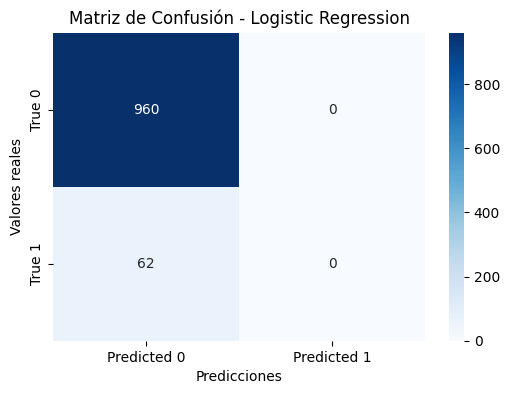

Logistic Regression - Accuracy: 0.9393346379647749
Logistic Regression - Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

Logistic Regression - Matriz de Confusión:
 [[960   0]
 [ 62   0]]
Logistic Regression - Kappa: 0.0


c:\Users\Joseka\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Joseka\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Joseka\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import cohen_kappa_score
# Crear el modelo de regresión logística
model = LogisticRegression(C=1.0, solver='liblinear', max_iter=1000)

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Calcular el valor Kappa
kappa_score = cohen_kappa_score(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.title("Matriz de Confusión - Logistic Regression")
plt.xlabel("Predicciones")
plt.ylabel("Valores reales")
plt.show()

# Evaluación del modelo (opcional, si deseas mostrar los resultados también)
print("Logistic Regression - Accuracy:", accuracy_score(y_test, y_pred))
print("Logistic Regression - Reporte de Clasificación:\n", classification_report(y_test, y_pred))
print("Logistic Regression - Matriz de Confusión:\n", conf_matrix)
print("Logistic Regression - Kappa:", kappa_score)

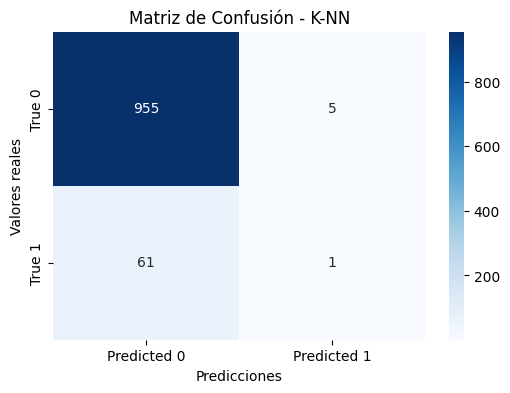

K-NN - Accuracy: 0.9354207436399217
K-NN - Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       960
           1       0.17      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.55      0.51      0.50      1022
weighted avg       0.89      0.94      0.91      1022

K-NN - Matriz de Confusión:
 [[955   5]
 [ 61   1]]
K-NN - Kappa: 0.018908540842448307


In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import cohen_kappa_score
# Entrena el modelo K-NN
knn_model = KNeighborsClassifier(n_neighbors=5)  # Puedes ajustar `n_neighbors` según sea necesario

# Entrenar el modelo
knn_model.fit(X_train, y_train.values.ravel())

# Predice en los datos de prueba
y_pred_knn = knn_model.predict(X_test)

# Calcular la matriz de confusión
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Calcular Kappa para K-NN
kappa_knn = cohen_kappa_score(y_test, y_pred_knn)

# Graficar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.title("Matriz de Confusión - K-NN")
plt.xlabel("Predicciones")
plt.ylabel("Valores reales")
plt.show()

# Evaluación del modelo
print("K-NN - Accuracy:", accuracy_score(y_test, y_pred_knn))
print("K-NN - Reporte de Clasificación:\n", classification_report(y_test, y_pred_knn))
print("K-NN - Matriz de Confusión:\n", conf_matrix_knn)
print("K-NN - Kappa:", kappa_knn)



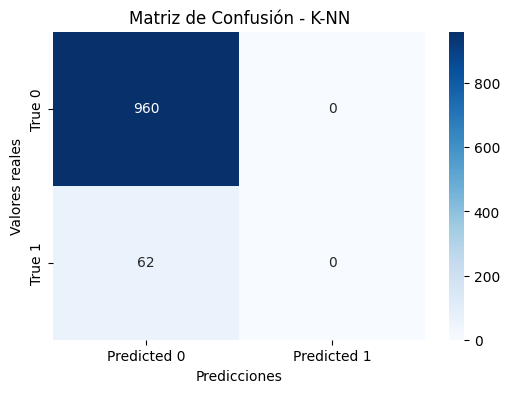

Random Forest - Accuracy: 0.9393346379647749
Random Forest - Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

Random Forest - Matriz de Confusión:
 [[960   0]
 [ 62   0]]
Random Forest - Kappa: 0.0


c:\Users\Joseka\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Joseka\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Joseka\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import cohen_kappa_score
# Entrena el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train.values.ravel())  # `y_train` convertido a 1D si es un DataFrame

# Predice en los datos de prueba
y_pred_rf = rf_model.predict(X_test)

# Calcular la matriz de confusión
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Calcular Kappa para Random Forest
kappa_rf = cohen_kappa_score(y_test, y_pred_rf)

# Graficar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.title("Matriz de Confusión - K-NN")
plt.xlabel("Predicciones")
plt.ylabel("Valores reales")
plt.show()

# Evaluación del modelo
print("Random Forest - Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest - Reporte de Clasificación:\n", classification_report(y_test, y_pred_rf))
print("Random Forest - Matriz de Confusión:\n", conf_matrix_rf)
print("Random Forest - Kappa:", kappa_rf)


##### LO QUE PODEMOS OBSERVAR ES LO QUE ESPERABAMOS. HAY UN DESBALANCE EN LAS CLASES DE LA VARIABLE TARGET. ES POR ESO QUE CASI TODOS LOS MODELOS SON CAPACES DE PREDECIR LA CLASE MAYORITARIA, AUNQUE PROBABLEMENTE DE FORMA AZAROSA (TIENEN UN VALOR KAPPA MUY EXTREMADAMENTE BAJO) Y NINGUNA O CASI NINGUNA DE LA CLASE MINORITARIA.

##### AHORA VAMOS A HACER DOS COSAS:

1) SOBREMUESTREAR LA VARIABLE TARGET, ENTRENAR Y EVALUAR LOS MODELOS CON OUTLIERS
2) SOBREMUESTREAR LA VARIABLE TARGET, ENTRENAR Y EVALUAR LOS MODELOS SIN OUTLIERS


### SOBREMUESTREO DE LA VARIABLE TARGET, ENTRENAR Y EVALUAR LOS MODELOS CON OUTLIERS

In [25]:
from imblearn.over_sampling import SMOTE
# Aplicar SMOTE para el sobremuestreo
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Ver el nuevo tamaño de las clases
print(f"Antes del sobremuestreo - Clases en y_train: \n{y_train.value_counts()}")
print(f"Después del sobremuestreo - Clases en y_train: \n{y_train_res.value_counts()}")

Antes del sobremuestreo - Clases en y_train: 
stroke
0    3900
1     187
Name: count, dtype: int64
Después del sobremuestreo - Clases en y_train: 
stroke
0    3900
1    3900
Name: count, dtype: int64


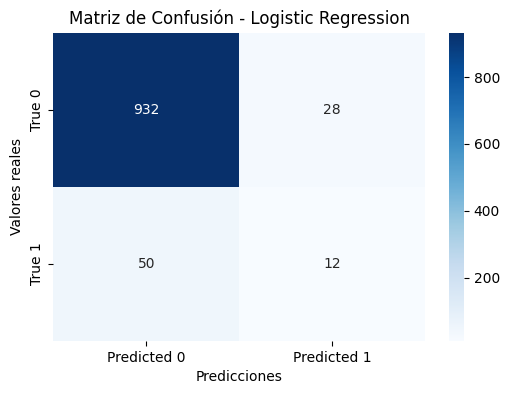

Logistic Regression - Accuracy: 0.923679060665362
Logistic Regression - Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       960
           1       0.30      0.19      0.24        62

    accuracy                           0.92      1022
   macro avg       0.62      0.58      0.60      1022
weighted avg       0.91      0.92      0.92      1022

Logistic Regression - Matriz de Confusión:
 [[932  28]
 [ 50  12]]
Logistic Regression - Kappa: 0.1970911727972281


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import cohen_kappa_score
# Crear el modelo de regresión logística
model = LogisticRegression(C=1.0, solver='liblinear', max_iter=1000)

# Entrenar el modelo
model.fit(X_train_res, y_train_res)

# Hacer predicciones
y_pred = model.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Calcular el valor Kappa
kappa_score = cohen_kappa_score(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.title("Matriz de Confusión - Logistic Regression")
plt.xlabel("Predicciones")
plt.ylabel("Valores reales")
plt.show()

# Evaluación del modelo (opcional, si deseas mostrar los resultados también)
print("Logistic Regression - Accuracy:", accuracy_score(y_test, y_pred))
print("Logistic Regression - Reporte de Clasificación:\n", classification_report(y_test, y_pred))
print("Logistic Regression - Matriz de Confusión:\n", conf_matrix)
print("Logistic Regression - Kappa:", kappa_score)

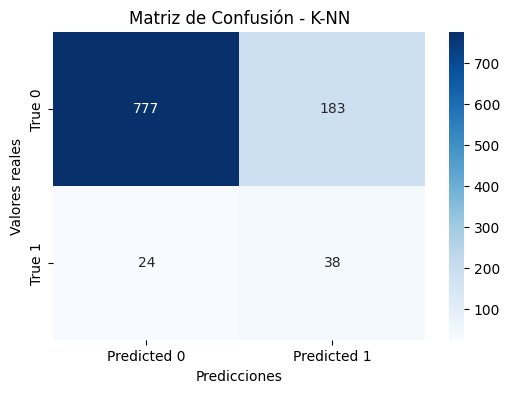

K-NN - Accuracy: 0.7974559686888454
K-NN - Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.97      0.81      0.88       960
           1       0.17      0.61      0.27        62

    accuracy                           0.80      1022
   macro avg       0.57      0.71      0.58      1022
weighted avg       0.92      0.80      0.85      1022

K-NN - Matriz de Confusión:
 [[777 183]
 [ 24  38]]
K-NN - Kappa: 0.19199303343492913


In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import cohen_kappa_score
# Entrena el modelo K-NN
knn_model = KNeighborsClassifier(n_neighbors=5)  # Puedes ajustar `n_neighbors` según sea necesario

# Entrenar el modelo
knn_model.fit(X_train_res, y_train_res.values.ravel())

# Predice en los datos de prueba
y_pred_knn = knn_model.predict(X_test)

# Calcular la matriz de confusión
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Calcular Kappa para K-NN
kappa_knn = cohen_kappa_score(y_test, y_pred_knn)

# Graficar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.title("Matriz de Confusión - K-NN")
plt.xlabel("Predicciones")
plt.ylabel("Valores reales")
plt.show()

# Evaluación del modelo
print("K-NN - Accuracy:", accuracy_score(y_test, y_pred_knn))
print("K-NN - Reporte de Clasificación:\n", classification_report(y_test, y_pred_knn))
print("K-NN - Matriz de Confusión:\n", conf_matrix_knn)
print("K-NN - Kappa:", kappa_knn)

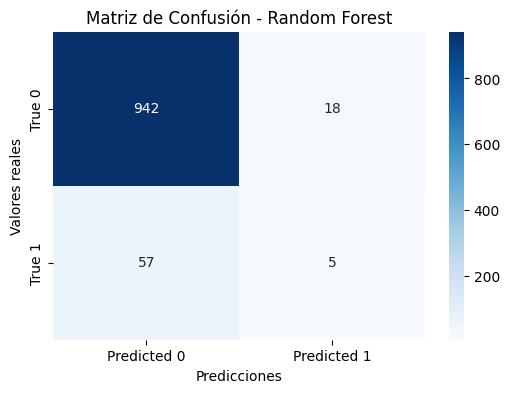

Random Forest - Accuracy: 0.9266144814090019
Random Forest - Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       960
           1       0.22      0.08      0.12        62

    accuracy                           0.93      1022
   macro avg       0.58      0.53      0.54      1022
weighted avg       0.90      0.93      0.91      1022

Random Forest - Matriz de Confusión:
 [[942  18]
 [ 57   5]]
Random Forest - Kappa: 0.08769549382275221


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import cohen_kappa_score
# Entrena el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Entrenar el modelo
rf_model.fit(X_train_res, y_train_res.values.ravel())  # `y_train` convertido a 1D si es un DataFrame

# Predice en los datos de prueba
y_pred_rf = rf_model.predict(X_test)

# Calcular la matriz de confusión
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Calcular Kappa para Random Forest
kappa_rf = cohen_kappa_score(y_test, y_pred_rf)

# Graficar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.title("Matriz de Confusión - Random Forest")
plt.xlabel("Predicciones")
plt.ylabel("Valores reales")
plt.show()

# Evaluación del modelo
print("Random Forest - Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest - Reporte de Clasificación:\n", classification_report(y_test, y_pred_rf))
print("Random Forest - Matriz de Confusión:\n", conf_matrix_rf)
print("Random Forest - Kappa:", kappa_rf)

##### AUNQUE NUESTROS MODELOS HAN MEJORADO, NO HA SIDO UN CAMBIO SIGNIFICATIVO. EL MODELO KNN ES EL QUE MEJOR RESULTADOS DA. VAMOS AHORA A QUITAR LOS OUTLIERS Y A HACER LOS MODELOS DE NUEVO

In [29]:
# Borrar Outliers
import pandas as pd
import numpy as np

# Suponiendo que 'data' es tu DataFrame
# Definir las columnas numéricas para eliminar outliers
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Calcular el IQR para las columnas numéricas
Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Establecer un valor umbral para la detección de outliers (por ejemplo, 1.5 veces el IQR)
threshold = 1.5

# Crear una máscara para los outliers en las columnas numéricas
outlier_mask = ((data[numeric_columns] < (Q1 - threshold * IQR)) | 
                (data[numeric_columns] > (Q3 + threshold * IQR))).any(axis=1)

# Eliminar las filas con outliers del dataset
data_cleaned = data[~outlier_mask].copy()


# Imprimir el número de filas eliminadas
num_rows_removed = len(data) - len(data_cleaned)
print(f"Número de filas eliminadas debido a outliers: {num_rows_removed}")

Número de filas eliminadas debido a outliers: 3658


##### SE HAN ELIMINADO 3658 FILAS. SI LE EXTRAREMOS A 5110 QUE SON LAS OBSERVACIONES ORIGINALES, LAS 3658 DE "OUTLIERS" NOS QUEDAMOS CON 1452. ESTO ES UN NUMERO EXTREMADAMENTE BAJO, PERO AUN ASI VAMOS A PROBAR.

In [30]:
from sklearn.model_selection import train_test_split

# Definir la variable objetivo y las características
X = data_cleaned.drop(columns=['stroke'])  # Características
y = data_cleaned['stroke']  # Variable objetivo

# Dividir los datos
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Conjunto de entrenamiento: {X_train_cleaned.shape[0]} filas')
print(f'Conjunto de prueba: {X_test_cleaned.shape[0]} filas')


print(X_train_cleaned.shape)
print(X_test_cleaned.shape)
print(y_train_cleaned.shape)
print(y_test_cleaned.shape)

Conjunto de entrenamiento: 1160 filas
Conjunto de prueba: 291 filas
(1160, 17)
(291, 17)
(1160,)
(291,)


In [31]:
from imblearn.over_sampling import SMOTE
# Aplicar SMOTE para el sobremuestreo
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_cleaned, y_train_cleaned)

# Ver el número de ejemplos por clase después de SMOTE
print(f"Distribución de clases en y_train antes del SMOTE: \n{y_train_cleaned.value_counts()}")
print(f"Distribución de clases en y_train después del SMOTE: \n{y_train_res.value_counts()}")

Distribución de clases en y_train antes del SMOTE: 
stroke
0    1129
1      31
Name: count, dtype: int64
Distribución de clases en y_train después del SMOTE: 
stroke
0    1129
1    1129
Name: count, dtype: int64


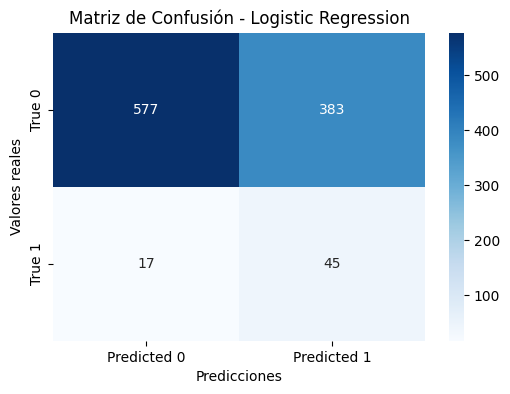

Logistic Regression - Accuracy: 0.6086105675146771
Logistic Regression - Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.97      0.60      0.74       960
           1       0.11      0.73      0.18        62

    accuracy                           0.61      1022
   macro avg       0.54      0.66      0.46      1022
weighted avg       0.92      0.61      0.71      1022

Logistic Regression - Matriz de Confusión:
 [[577 383]
 [ 17  45]]
Logistic Regression - Kappa: 0.08690485763041977


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import cohen_kappa_score
# Crear el modelo de regresión logística
model = LogisticRegression(C=1.0, solver='liblinear', max_iter=1000)

# Entrenar el modelo
model.fit(X_train_res, y_train_res)

# Hacer predicciones
y_pred = model.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Calcular el valor Kappa
kappa_score = cohen_kappa_score(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.title("Matriz de Confusión - Logistic Regression")
plt.xlabel("Predicciones")
plt.ylabel("Valores reales")
plt.show()

# Evaluación del modelo (opcional, si deseas mostrar los resultados también)
print("Logistic Regression - Accuracy:", accuracy_score(y_test, y_pred))
print("Logistic Regression - Reporte de Clasificación:\n", classification_report(y_test, y_pred))
print("Logistic Regression - Matriz de Confusión:\n", conf_matrix)
print("Logistic Regression - Kappa:", kappa_score)

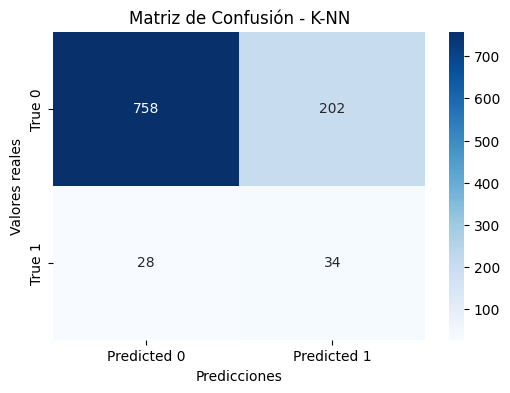

Random Forest - Accuracy: 0.7749510763209393
Random Forest - Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.96      0.79      0.87       960
           1       0.14      0.55      0.23        62

    accuracy                           0.77      1022
   macro avg       0.55      0.67      0.55      1022
weighted avg       0.91      0.77      0.83      1022

Random Forest - Matriz de Confusión:
 [[758 202]
 [ 28  34]]
Random Forest - Kappa: 0.14614300451883822


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import cohen_kappa_score
# Entrena el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Entrenar el modelo
rf_model.fit(X_train_res, y_train_res.values.ravel())  # `y_train` convertido a 1D si es un DataFrame

# Predice en los datos de prueba
y_pred_rf = rf_model.predict(X_test)

# Calcular la matriz de confusión
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Calcular Kappa para Random Forest
kappa_rf = cohen_kappa_score(y_test, y_pred_rf)

# Graficar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.title("Matriz de Confusión - K-NN")
plt.xlabel("Predicciones")
plt.ylabel("Valores reales")
plt.show()

# Evaluación del modelo
print("Random Forest - Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest - Reporte de Clasificación:\n", classification_report(y_test, y_pred_rf))
print("Random Forest - Matriz de Confusión:\n", conf_matrix_rf)
print("Random Forest - Kappa:", kappa_rf)

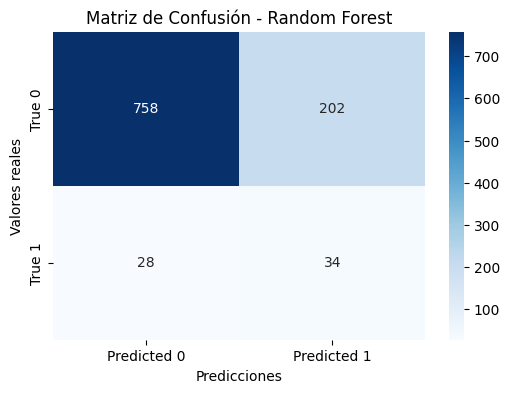

Random Forest - Accuracy: 0.7749510763209393
Random Forest - Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.96      0.79      0.87       960
           1       0.14      0.55      0.23        62

    accuracy                           0.77      1022
   macro avg       0.55      0.67      0.55      1022
weighted avg       0.91      0.77      0.83      1022

Random Forest - Matriz de Confusión:
 [[758 202]
 [ 28  34]]
Random Forest - Kappa: 0.14614300451883822


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import cohen_kappa_score
# Entrena el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Entrenar el modelo
rf_model.fit(X_train_res, y_train_res.values.ravel())  # `y_train` convertido a 1D si es un DataFrame

# Predice en los datos de prueba
y_pred_rf = rf_model.predict(X_test)

# Calcular la matriz de confusión
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Calcular Kappa para Random Forest
kappa_rf = cohen_kappa_score(y_test, y_pred_rf)

# Graficar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.title("Matriz de Confusión - Random Forest")
plt.xlabel("Predicciones")
plt.ylabel("Valores reales")
plt.show()

# Evaluación del modelo
print("Random Forest - Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest - Reporte de Clasificación:\n", classification_report(y_test, y_pred_rf))
print("Random Forest - Matriz de Confusión:\n", conf_matrix_rf)
print("Random Forest - Kappa:", kappa_rf)

##### OBSERVAMOS QUE LOS RESULTADOS SON INCLUSO PEORES, COSA QUE NO ES DE EXTRAÑAR. POR PROBAR UNA ÚLTIMA COSA, AL MODELO LOGÍSTICO ORIGINAL, VAMOS A PONER UN HIPERPARÁMETRO NUEVO LLAMADO "Class_weight" = "balanced" QUE INTENTARÁ DISTRIBUIR LOS PESOS EQUITATIVAMENTE DE LAS DISTINTAS CLASES DE STROKE. A VER QUE TAL VA.

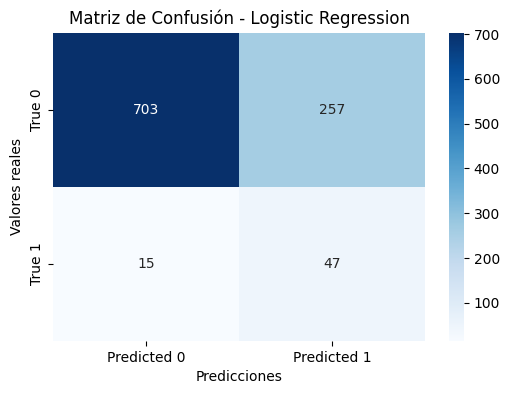

Logistic Regression - Accuracy: 0.7338551859099804
Logistic Regression - Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.98      0.73      0.84       960
           1       0.15      0.76      0.26        62

    accuracy                           0.73      1022
   macro avg       0.57      0.75      0.55      1022
weighted avg       0.93      0.73      0.80      1022

Logistic Regression - Matriz de Confusión:
 [[703 257]
 [ 15  47]]
Logistic Regression - Kappa: 0.17354231825803623


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import cohen_kappa_score
# Crear el modelo de regresión logística
model = LogisticRegression(C=1.0, solver='liblinear', max_iter=1000, class_weight='balanced')

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Calcular el valor Kappa
kappa_score = cohen_kappa_score(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.title("Matriz de Confusión - Logistic Regression")
plt.xlabel("Predicciones")
plt.ylabel("Valores reales")
plt.show()

# Evaluación del modelo (opcional, si deseas mostrar los resultados también)
print("Logistic Regression - Accuracy:", accuracy_score(y_test, y_pred))
print("Logistic Regression - Reporte de Clasificación:\n", classification_report(y_test, y_pred))
print("Logistic Regression - Matriz de Confusión:\n", conf_matrix)
print("Logistic Regression - Kappa:", kappa_score)

##### OBSERVAMOS QUE EL VALOR KAPPA PARA EL MODELO LOGISTICO SON SMOTE ES DE 0.197 Y PARA EL HIPERPARÁMETRO APLICADO ES DE 0.1735. ES DECIR, PARECE QUE SMOTE HACE UN MEJOR TRABAJO QUE EL HIPERPARÁMETRO CLASS_WEIGHT. EN LOS OTROS DOS MODELOS NO EXISTE ESTE HIPERPARÁMETRO, PERO SIMILARES. NO LOS HAGO PORQUE ES MUY PROBABLE QUE SMOTE SIGA SURTIENDO MEJOR EFECTO. AUN ASÍ, OS LO DEJO A VOSOTROS PARA QUE LO HAGAIS Y COMPARTAIS LOS RESULTADOS!

##### COMO CONCLUSIÓN FINAL, PODEMOS VER QUE EL DATASET ESTÁ DESBALANCEADO Y, AUNQUE INTENTEMOS USAR SMOTE, NO MEJORA MUCHO LA EFICIENCIA DE NUESTROS MODELOS. POR OTRO LADO, EN ESTE CASO LOS POSIBLES OUTLIERS NO LO FUERON, POR LO QUE DEBEN SER INCLUIDOS EN EL ANÁLISIS. ADEMÁS, ERAN MÁS DE LA MITAD, POR LO QUE ELIMINARLOS YA SE VEÍA VENIR QUE NO ERA LA MEJOR OPCIÓN. 